# Preparations

In [1]:
# Do something with Pkg...
import Pkg
Pkg.DEFAULT_IO[] = stdout;

In [2]:
# Fetch packages.
using JSON
using Plots; mm = Plots.mm;

In [3]:
# Benchamrking parameters
lengs = 10 .^(range(1,stop=3,length=3));

In [75]:
# Declares the methods.
methods_ode_catalyst_lsoda_n_CVODE = [("catalyst_lsoda_NoLinSolver","Catalyst (lsoda, NoLinSol)",:lightskyblue,:solid,:star4),("catalyst_CVODE_BDF_NoLinSolver","Catalyst (CVODE, NoLinSol)",:royalblue,:solid,:circle),("catalyst_CVODE_BDF_LapackDense","Catalyst (CVODE, LapackDense)",:purple4,:solid,:heptagon),("catalyst_CVODE_BDF_GMRES","Catalyst (CVODE_BDF, GMRES)",:lightslateblue,:solid,:diamond),("catalyst_CVODE_BDF_jac_LapackDense","Catalyst (CVODE_BDF, jac=true, LapackDense)",:turquoise2,:solid,:rect),("catalyst_CVODE_BDF_jac_sparse_KLU","Catalyst (CVODE_BDF, jac=true, sparse=true, KLU)",:navyblue,:solid,:dtriangle)];
methods_ode_catalyst_other = [("catalyst_TRBDF2_NoLinSolver","Catalyst (TRBDF2, NoLinSolver)",:lightslateblue,:solid,:diamond),("catalyst_KenCarp4_NoLinSolver","Catalyst (KenCarp4, NoLinSolver)",:turquoise2,:solid,:rect),("catalyst_QNDF_NoLinSolver","Catalyst (QNDF, NoLinSolver)",:navyblue,:solid,:dtriangle),("catalyst_FBDF_NoLinSolver","Catalyst (FBDF, NoLinSolver)",:darkmagenta,:solid,:star5),("catalyst_Rosenbrock23_NoLinSolver","Catalyst (Rosenbrock23, NoLinSolver)",:purple4,:solid,:heptagon)]
methods_ode_catalyst_other_jac = [("catalyst_TRBDF2_jac_NoLinSolver","Catalyst (TRBDF2, NoLinSolver)",:lightslateblue,:solid,:diamond),("catalyst_KenCarp4_jac_NoLinSolver","Catalyst (KenCarp4, NoLinSolver)",:turquoise2,:solid,:rect),("catalyst_QNDF_jac_NoLinSolver","Catalyst (QNDF, NoLinSolver)",:navyblue,:solid,:dtriangle),("catalyst_FBDF_jac_NoLinSolver","Catalyst (FBDF, NoLinSolver)",:darkmagenta,:solid,:star5)]
methods_ode_catalyst_other_jac_sparse = [("catalyst_TRBDF2_jac_sparse_KLUFactorization","Catalyst (TRBDF2, KLUFactorization)",:lightslateblue,:solid,:diamond),("catalyst_KenCarp4_jac_sparse_KLUFactorization","Catalyst (KenCarp4, KLUFactorization)",:turquoise2,:solid,:rect),("catalyst_QND_jac_sparse_KLUFactorizationF","Catalyst (QNDF, KLUFactorization)",:navyblue,:solid,:dtriangle),("catalyst_FBDF_jac_sparse_KLUFactorization","Catalyst (FBDF, KLUFactorization)",:darkmagenta,:solid,:star5)]
methods_ode_other = [("bionetgen_ode","Bionetgen (CVODE)",:lime,:solid,:pentagon),("bionetgen_sparse_ode","Bionetgen (CVODE)",:green,:solid,:octagon), ("copasi_deterministic","Copasi (LSODA)",:orange,:solid,:star8),("gillespy2_lsoda","Gillespy2 (LSODA)",:magenta,:solid,:star6),("matlab_ode","MATLAB SimBiology (CVODE)",:red,:solid,:utriangle)]
methods_ssa = [("catalyst_Direct","Catalyst (Direct)",:lightskyblue1,:solid,:star4),("catalyst_SortingDirect","Catalyst (SortingDirect)",:indigo,:solid,:circle),("catalyst_RSSA","Catalyst (RSSA)",:lightslateblue,:solid,:diamond),("catalyst_RSSACR","Catalyst (RSSACR)",:royalblue4,:solid,:rect),("bionetgen_ssa","Bionetgen (SortingDirect)",:lime,:dash,:pentagon),("copasi_directMethod","Copasi (Direct)",:orange,:solid,:star8),("gillespy2_ssa","Gillespy2 (Direct)",:magenta,:solid,:star6),("matlab_ssa","MATLAB SimBiology (Direct)",:red,:solid,:utriangle)];

# Function for get selection of ODE methods for main plot (select Catalyst CVODE method and BioNetGen sparsity).
get_ode_methods(cvode_solver,bionetgen_solver) = [("catalyst_lsoda_NoLinSolver","Catalyst (lsoda)",:lightskyblue,:solid,:star4);(cvode_solver,"Catalyst (CVODE)",:royalblue,:solid,:circle);(bionetgen_solver,"Bionetgen (CVODE)",:lime,:solid,:pentagon);methods_ode_other[3:end]];

In [68]:
# Function for plotting a specific benchamrk.
ticks = [1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9]
function plot_benchmarks(model,methods;lw=6,legendfontsize=7,legend=:topleft,ymin=0.1,xticks=ticks,yticks=ticks,kwargs...)
    plot(); 
    xmin = 10.0; xmax = 0.0; ymax = 0.0;
    for (i,method) in enumerate(methods)
        !isfile("Benchmarking_results/$(method[1])_$(model).json") && continue
        br = JSON.parsefile("Benchmarking_results/$(method[1])_$(model).json")
        plot!(br["lengs"],br["medians"],lw=lw,la=0.8,label="",xaxis=:log,yaxis=:log,xguide="Model (physical) final time (s)",yguide="Simulation runtime (ms)",color=method[3],linestyle=method[4])
        plot!(br["lengs"],br["medians"],seriestype=:scatter,markersize=6,markershape=method[5],markeralpha=0.6,label=method[2],color=method[3],xticks=xticks,yticks=yticks)
        xmin = min(xmin,br["lengs"]...); xmax = max(xmax,br["lengs"]...); ymax = max(ymax,br["medians"]...); 
    end
    plot!(;legend=legend, legendfontsize=legendfontsize, framestyle=:box, xlimit=(xmin,xmax), ylimit=(ymin,1.2*ymax),kwargs...)    
end
function plot_ode_benchmarks(model,ylimit,xlimit)
    p1 = plot_benchmarks(model,methods_ode_catalyst_lsoda_n_CVODE;title="$(uppercasefirst(model)) - ODE (Catalyst)")
    p2 = plot_benchmarks(model,methods_ode_catalyst_other;title="$(uppercasefirst(model)) - ODE (Catalyst)", yticks=[],yguide="")
    p3 = plot_benchmarks(model,methods_ode_catalyst_other_jac;title="$(uppercasefirst(model)) - ODE (Catalyst, jacobian)", yticks=[],yguide="")
    p4 = plot_benchmarks(model,methods_ode_catalyst_other_jac_sparse;title="$(uppercasefirst(model)) - ODE (Catalyst, sparse jacobian)", yticks=[],yguide="")
    p5 = plot_benchmarks(model,methods_ode_other;title="$(uppercasefirst(model)) - ODE (Other tools)", yticks=[],yguide="");
    plot(p1,p2,p3,p4,p5,size=(2500,350),xlimit=xlimit,ylimit=ylimit,layout=(1,5),bottom_margin=15mm,left_margin=15mm,top_margin=5mm)
end;

# Plots Benchmarks

### Multistate

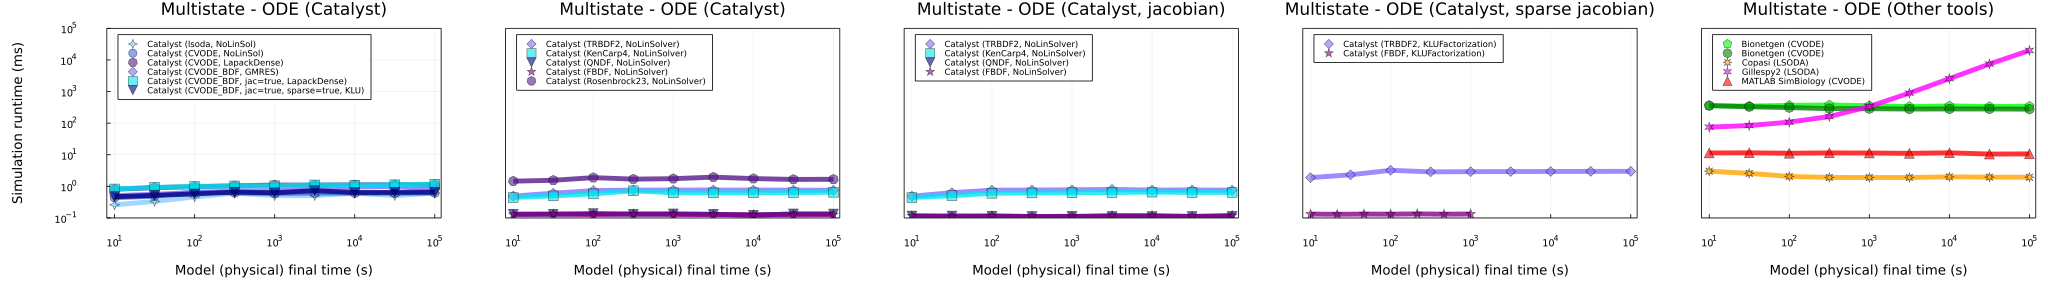

In [78]:
# Show vaiours ODE simualtions.
multistate_ode_benchmark_all_plot = plot_ode_benchmarks("multistate",(1e-1,1e5),(8,120000))

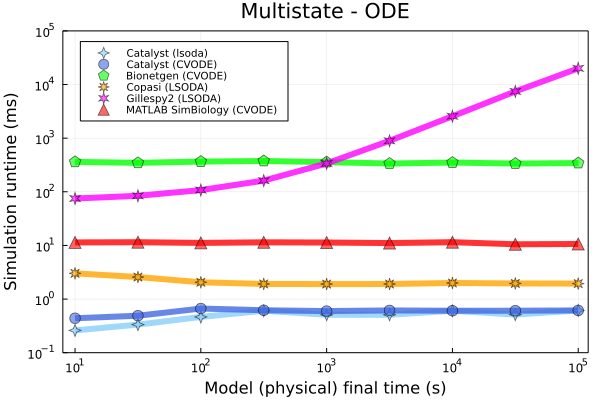

In [43]:
# Simulations time for ODE simulations.
multistate_ode_benchmark_plot = plot_benchmarks("multistate",get_ode_methods("catalyst_CVODE_BDF_NoLinSolver","bionetgen_ode");title="Multistate - ODE", ylimit=(1e-1,1e5),xlimit=(8,120000))

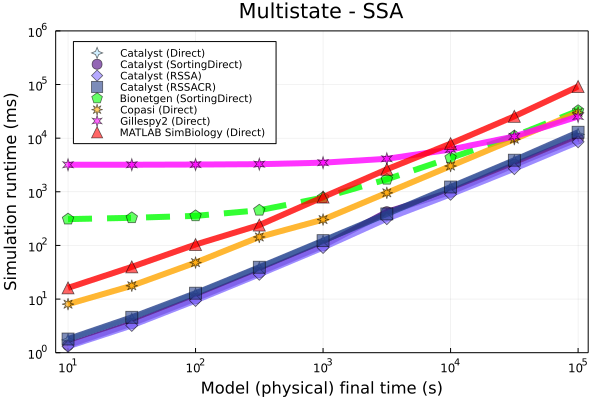

In [44]:
# Simulations time for Gillespie simulations.
multistate_gillespie_benchmark_plot = plot_benchmarks("multistate",methods_ssa;title="Multistate - SSA",ylimit=(1e0,1e6),xlimit=(8,120000))

### Multisite2

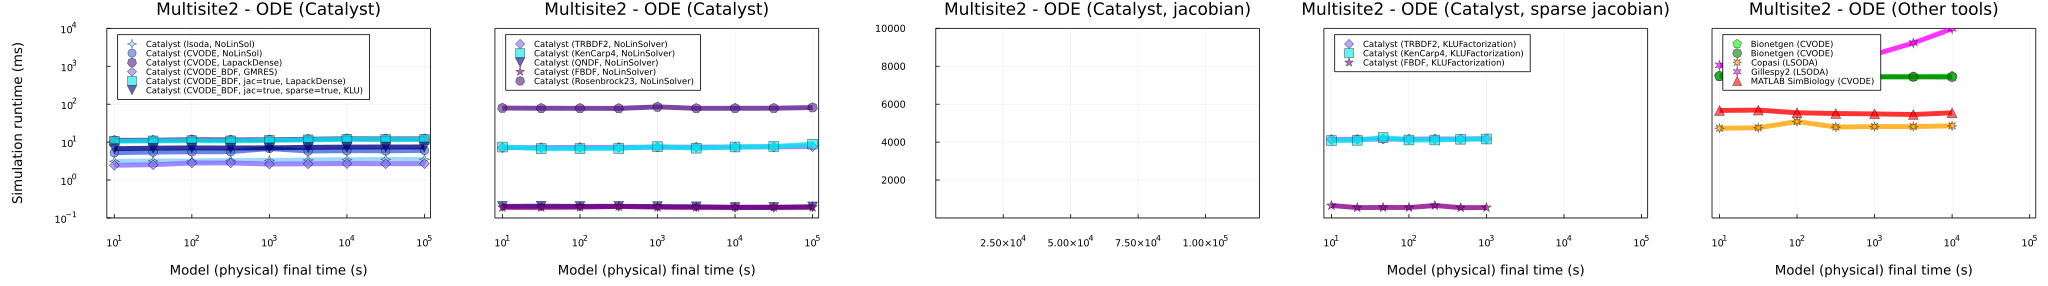

In [79]:
# Show vaiours ODE simualtions.
multisite2_ode_benchmark_all_plot = plot_ode_benchmarks("multisite2",(1e-1,1e4),(8,120000))

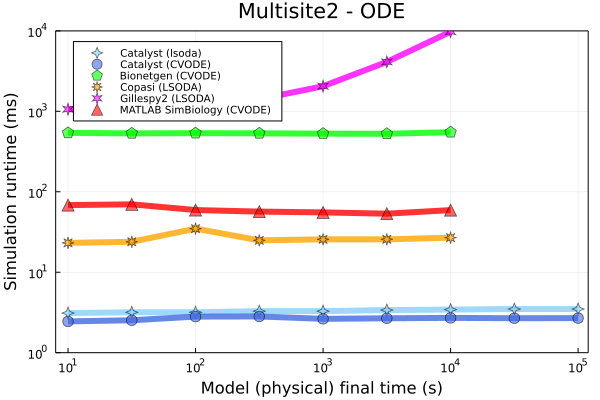

In [51]:
# Simulations time for ODE simulations.
multisite2_ode_benchmark_plot = plot_benchmarks("multisite2",get_ode_methods("catalyst_CVODE_BDF_GMRES","bionetgen_ode");title="Multisite2 - ODE", ylimit=(1e0,1e4),xlimit=(8,120000))

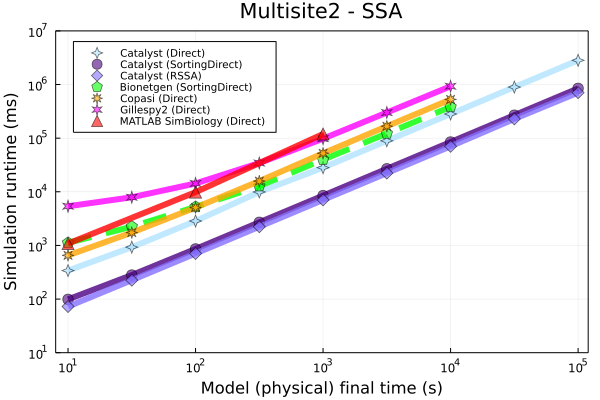

In [52]:
# Simulations time for Gillespie simulations.
multisite2_gillespie_benchmark_plot = plot_benchmarks("multisite2",methods_ssa;title="Multisite2 - SSA",ylimit=(1e1,1e7),xlimit=(8,120000))

### Egfr_net

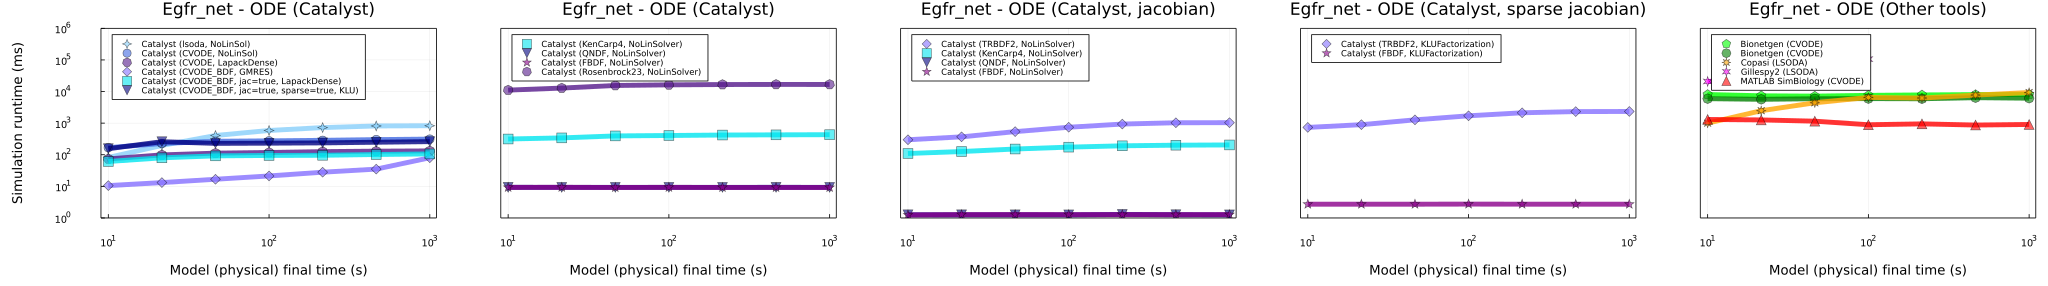

In [71]:
# Show vaiours ODE simualtions.
egfr_net_ode_benchmark_all_plot = plot_ode_benchmarks("egfr_net",(1e0,1e6),(9,1100))

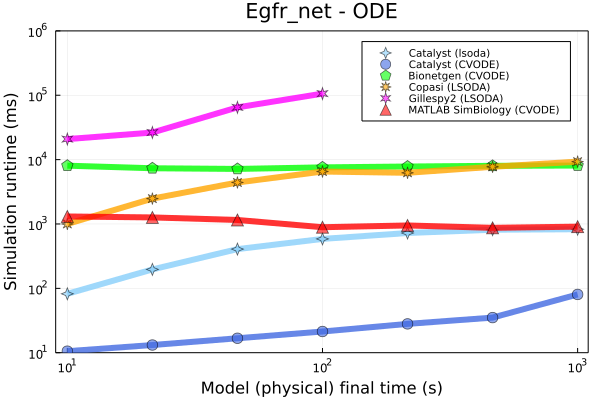

In [55]:
# Simulations time for ODE simulations.
egfr_net_ode_benchmark_plot = plot_benchmarks("egfr_net",get_ode_methods("catalyst_CVODE_BDF_GMRES","bionetgen_ode");title="Egfr_net - ODE", ylimit=(1e1,1e6),xlimit=(9,1100),legend=:topright)

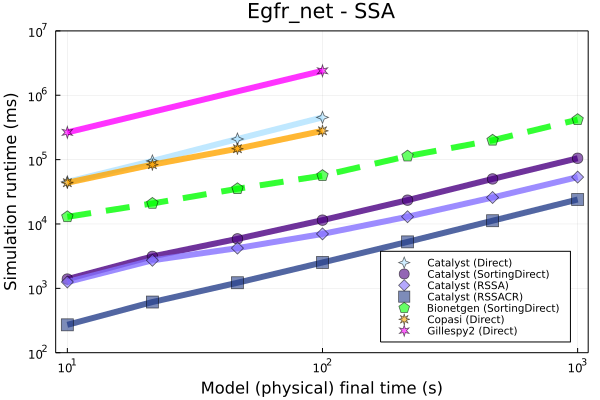

In [56]:
# Simulations time for Gillespie simulations.
egfr_net_gillespie_benchmark_plot = plot_benchmarks("egfr_net",methods_ssa;title="Egfr_net - SSA", ylimit=(1e2,1e7),xlimit=(9,1100),legend=:bottomright)

### BCR

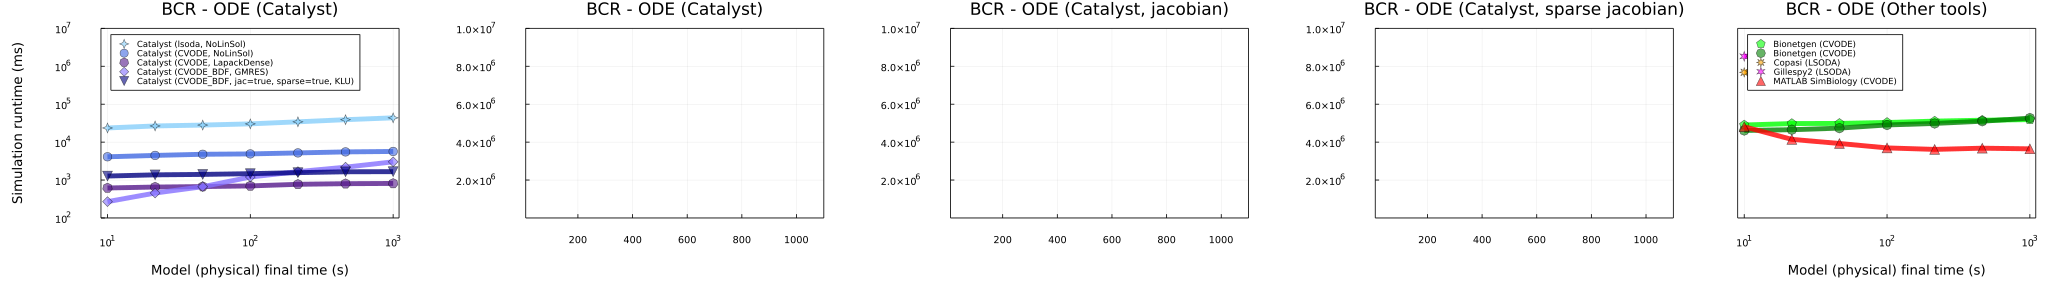

In [82]:
# Show vaiours ODE simualtions.
BCR_ode_benchmark_all_plot = plot_ode_benchmarks("BCR",(1e2,1e7),(9,1100))

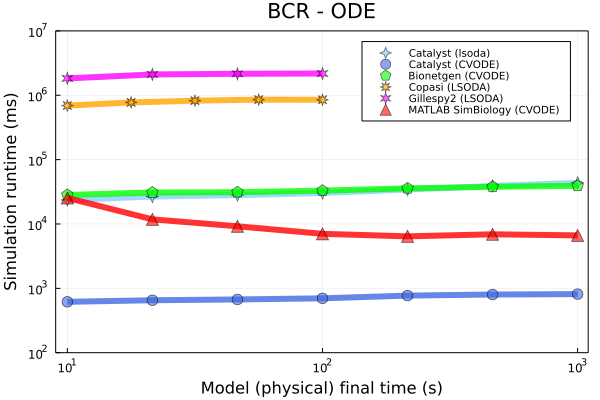

In [84]:
# Simulations time for ODE simulations.
BCR_ode_benchmark_plot = plot_benchmarks("BCR",get_ode_methods("catalyst_CVODE_BDF_LapackDense","bionetgen_ode");title="BCR - ODE", ylimit=(1e2,1e7),xlimit=(9,1100),legend=:topright)

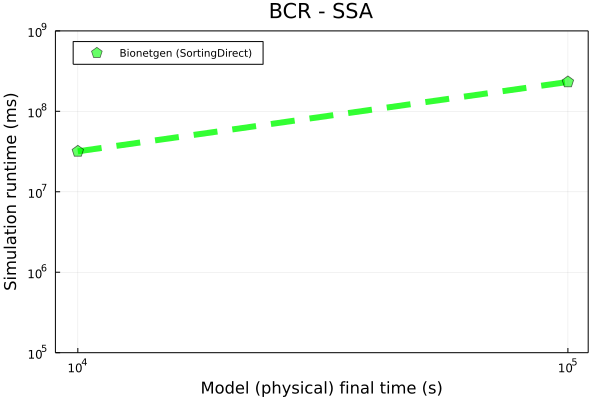

In [81]:
# Simulations time for Gillespie simulations.
BCR_gillespie_benchmark_plot = plot_benchmarks("BCR",methods_ssa;title="BCR - SSA", ylimit=(1e5,1e9),xlimit=(9000,110000))

### Fceri_gamma2

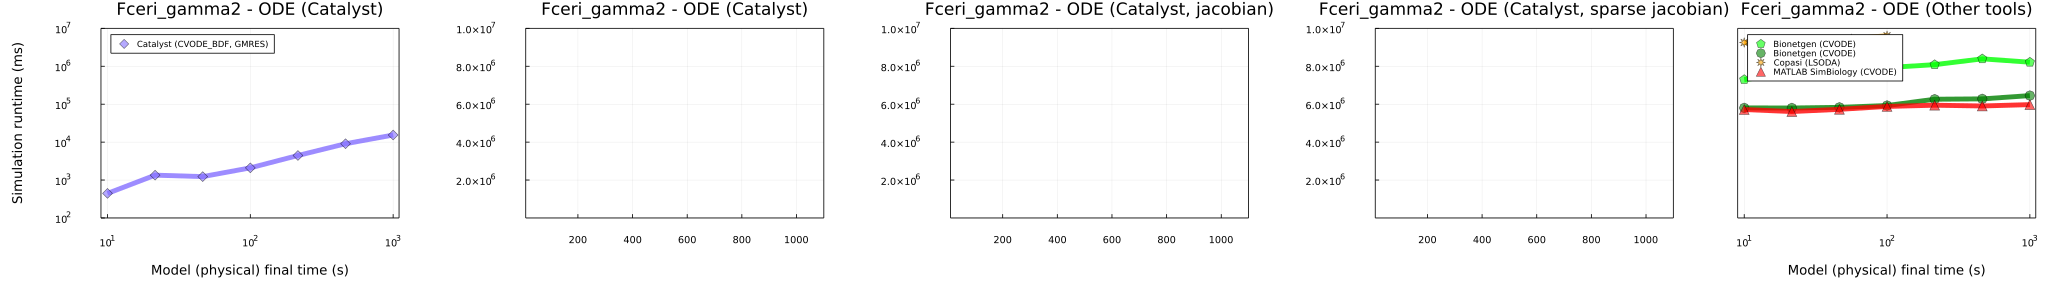

In [80]:
# Show vaiours ODE simualtions.
fceri_gamma2_ode_benchmark_all_plot = plot_ode_benchmarks("fceri_gamma2",(1e2,1e7),(9,1100))

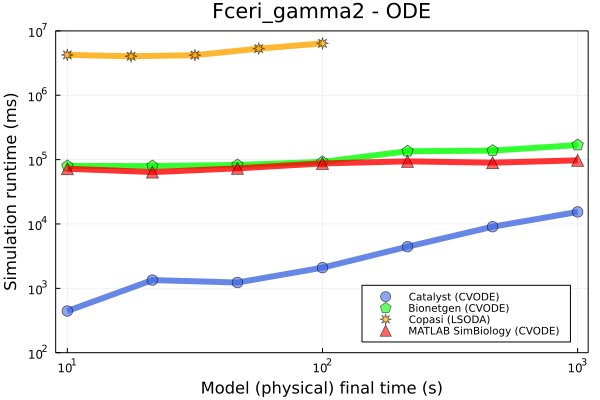

In [61]:
# Simulations time for ODE simulations.
fceri_gamma2_ode_benchmark_plot = plot_benchmarks("fceri_gamma2",get_ode_methods("catalyst_CVODE_BDF_GMRES","bionetgen_sparse_ode");title="Fceri_gamma2 - ODE", ylimit=(1e2,1e7),xlimit=(9,1100),legend=:bottomright)

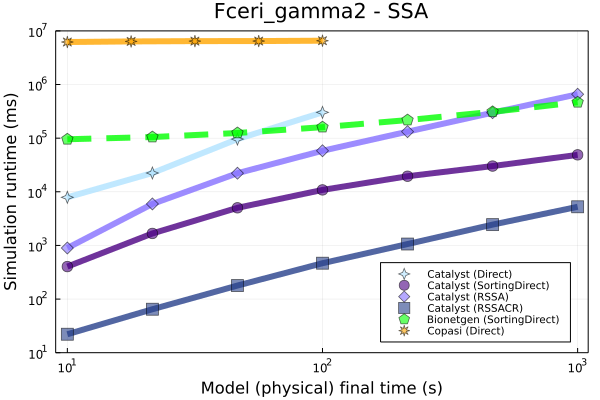

In [83]:
# Simulations time for Gillespie simulations.
fceri_gamma2_gillespie_benchmark_plot = plot_benchmarks("fceri_gamma2",methods_ssa;title="Fceri_gamma2 - SSA", ylimit=(1e1,1e7),xlimit=(9,1100),legend=:bottomright)

### Combined Plot

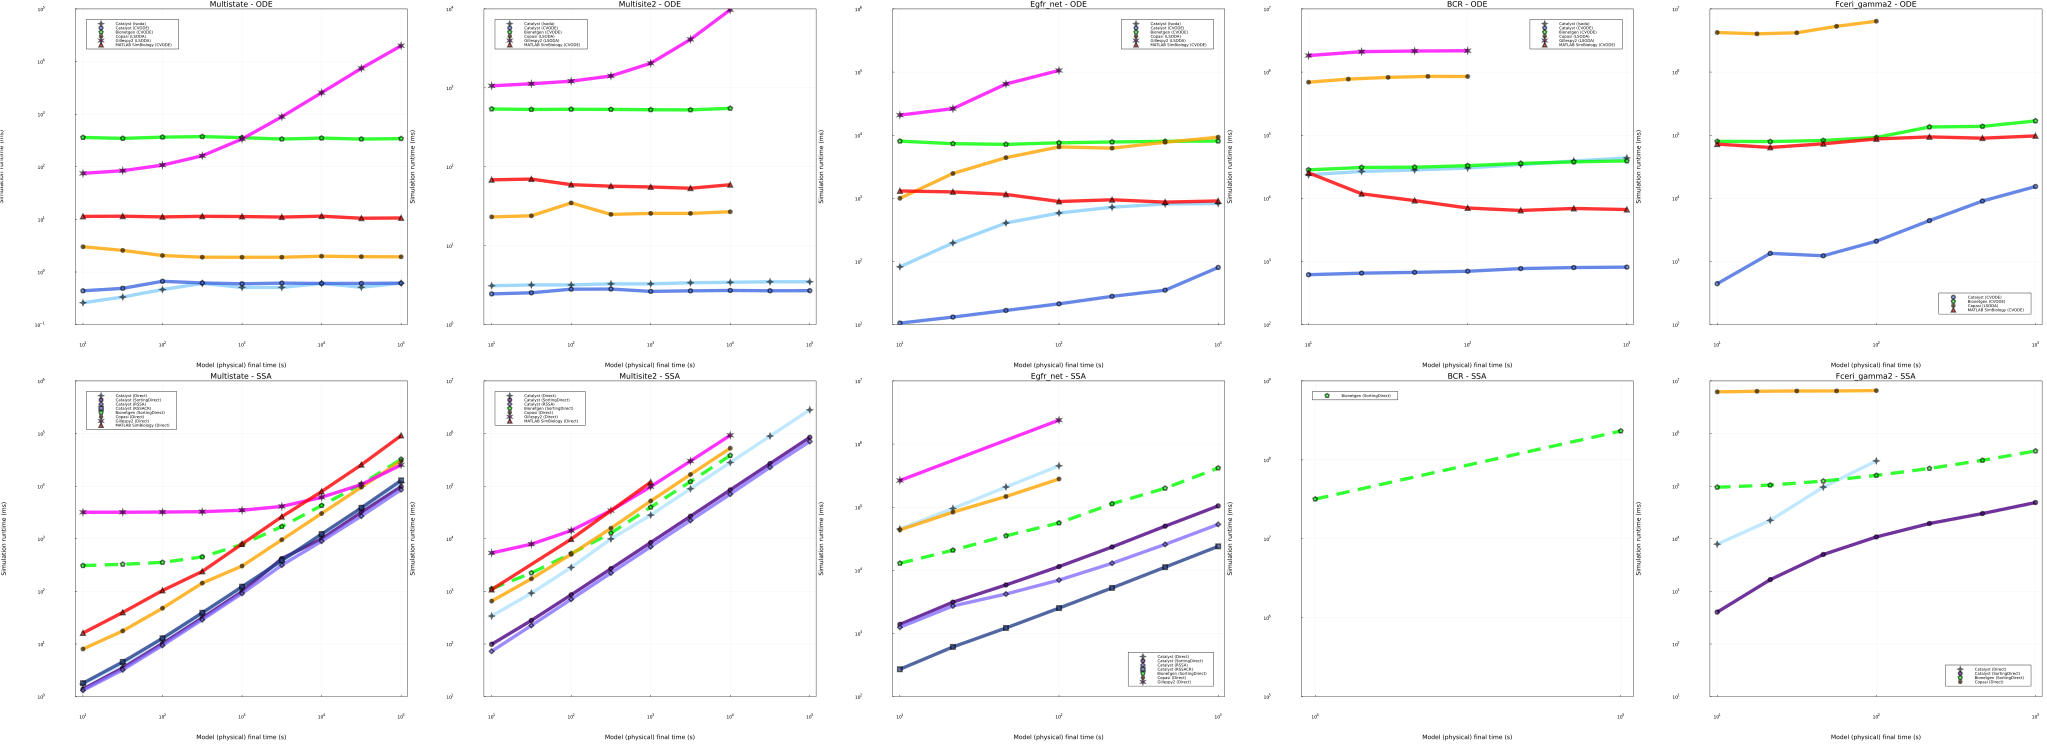

In [63]:
combined_benchmarks_plot = plot(multistate_ode_benchmark_plot,multisite2_ode_benchmark_plot,egfr_net_ode_benchmark_plot,BCR_ode_benchmark_plot,fceri_gamma2_ode_benchmark_plot,multistate_gillespie_benchmark_plot,multisite2_gillespie_benchmark_plot,egfr_net_gillespie_benchmark_plot,BCR_gillespie_benchmark_plot,fceri_gamma2_gillespie_benchmark_plot,
     layout=(2,5),size=(5500,2000),left_margin=25mm,bottom_margin=20mm,lw=9,grid=true)

In [22]:
# Function for saving benchmark (both as png, and an svg that can be processed further).
function savefigure(figure, figname)
    savefig(figure,"Plots/$(figname).png")
    savefig(plot!(figure,legend=:none,xguide="",yguide="",title="",xticks=[],yticks=[]),"Plots/$(figname).svg")
end;

In [23]:
savefigure(combined_benchmarks_plot,"benchmarks_plot)")

In [25]:
savefigure(multistate_ode_benchmark_all_plot,"multistate_ode_benchmarks_plot)")
savefigure(multisite2_ode_benchmark_all_plot,"multisite2_ode_benchmarks_plot)")
savefigure(egfr_net_ode_benchmark_all_plot,"egfr_net_ode_benchmarks_plot)")
savefigure(BCR_ode_benchmark_all_plot,"BCR_ode_benchmarks_plot)")
savefigure(fceri_gamma2_ode_benchmark_all_plot,"fceri_gamma2_ode_benchmarks_plot)")